<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS420-AI/blob/main/Laboratorios/LAB-05/RN_regresion_logistica_mult_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **LAB-05 REDES NEURONALES - REGRESIÓN LOGÍSTICA MULTICLASE con Pythorch**



# Implementación del modelo de regresión logística multiclase con una Red Neuronal

En este ejercicio implementaremos una red neuronal con regresion logistica multiclase y se aplica a dos diferentes datasets.

Nuestro objetuvo es predecir los número de label que son escritos del 0 al 9 en una imagen de 28x28 pixeles.
En el siguiente dataset **MNIST FGSM** `minist_train.csv` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/sudulakishore/mnist-fgsm?select=mnist_train.csv

Link del Repositorio de GitHub LAB-05: https://github.com/Gonzales-Franz-Reinaldo/SIS420-AI/tree/main/Laboratorios/LAB-05

# **1. Preprocesamiento de los Datos**

## Información del Dataset

### MNIST FGSM

Un conjunto de datos similar al MNIST de 70.000 imágenes de 28 x 28 etiquetadas como Método de señalización de gradiente rápido


### Acerca del conjunto de datos

#### Contexto

MNIST-FGSM es un conjunto de datos de imágenes adversarias que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de 10 clases. MNIST-FGSM tiene la intención de servir como un reemplazo directo del conjunto de datos original de MNIST para la evaluación comparativa de algoritmos de aprendizaje automático en ejemplos antagónicos. Comparte el mismo tamaño de imagen y la misma estructura de las divisiones de entrenamiento y prueba.

El conjunto de datos original de MNIST contiene una gran cantidad de dígitos escritos a mano. A los miembros de la comunidad de IA/ML/Data Science les encanta este conjunto de datos y lo utilizan como punto de referencia para validar sus algoritmos. De hecho, MNIST suele ser el primer conjunto de datos que intentan los investigadores. "Si no funciona en el MNIST, no funcionará en absoluto", dijeron. "Bueno, si funciona en el MNIST, aún puede fallar en otros".

Compruebe la precisión de sus modelos en este conjunto de datos y mejore la solidez adversaria de los modelos

#### Contenido

Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles en total. Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel, y los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas. La primera columna consta de las etiquetas de clase (ver arriba) y representa un número entero. El resto de las columnas contienen los valores de píxel de la imagen asociada.

Para ubicar un píxel en la imagen, supongamos que hemos descompuesto x como x = i * 28 + j, donde i y j son números enteros entre 0 y 27. El píxel se encuentra en la fila i y la columna j de una matriz de 28 x 28.
Por ejemplo, 31 indica el píxel que está en la cuarta columna desde la izquierda y la segunda fila desde la parte superior, como en el diagrama ascii a continuación.

#### Descripción

. De las columnas: Cada fila es una imagen

. independiente, la columna 1 es la etiqueta de la clase (enteros del 0 al 9).

. Las columnas restantes son números de píxeles (784 en total).

. Cada valor es la oscuridad del píxel (de 1 a 255)

## Introduction

En este ejercicio se implementa una red neuronal para reconocimiento de digitos utilizando pytorch.

Antes de empezar la ejecución de las partes de codigo correspondienters a los ejercicios, se requiere importar todas las librerias necesarias.

## Importación de las Librerias

In [ ]:

# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
import torchvision


# Librerias de Pythorch
import torch
from torch import optim  # Para optimizadores como SGD, Adam, etc.
from torch import nn  # Todos los módulos de redes neuronales
from torch.utils.data import DataLoader  # Proporciona una gestión de conjuntos de datos más sencilla mediante la creación de mini lotes, etc.
import torchvision # paquete de antorcha para cosas relacionadas con la visión
import torchvision.transforms as transforms  # Transformaciones que podemos realizar en nuestro conjunto de datos para aumentarlo
import torch.nn.functional as F  # Funciones sin parámetros, como (algunas) funciones de activación
import torchvision.datasets as datasets  # Standard datasets
from tqdm import tqdm  # ¡Para una buena barra de progreso!
from torch.utils.data import TensorDataset, DataLoader

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Obtención y Preparación de Datos:

In [ ]:
# Obtenemos los datos
df_train = pd.read_csv('/content/drive/MyDrive/SIS420-IA/Laboratorios/LAB-05/mnist_train.csv', delimiter=',')
df_test = pd.read_csv('/content/drive/MyDrive/SIS420-IA/Laboratorios/LAB-05/mnist_test.csv', delimiter=',')

# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 100)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos de entrenamiento
df_train

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,5,25,25,25,24,24,25,25,25,25,17,13,25,25,25,23,1,9,25,25,25,25,25,25,17,0,15,25,25,25,25,25,12,12,24,25,25,25,25,25,25,25,25,25,20,9,25,25,25,20,25,25,25,15,1,20,25,25,25,25,12,0,20,25,25,25,25,25,25,25,25,25,20,5,16,16,23,1,16,18,25,25,9,20,25,25,25,25,12,8,22,13,25,25,25,25,25,15,24,12,10,0,0,0,20,1,0,2,12,19,9,10,24,25,25,25,12,16,25,1,25,25,25,25,25,19,28,0,0,4,12,11,9,47,33,29,10,12,9,0,8,25,25,25,22,23,9,0,5,5,5,24,47,55,74,28,39,86,111,103,52,173,209,172,115,42,21,4,0,25,25,25,25,25,24,1,28,48,31,74,151,199,240,239,240,235,233,228,200,247,252,199,101,39,25,24,1,23,25,25,24,24,24,26,70,175,212,218,221,223,227,226,253,255,231,149,110,67,42,65,36,25,23,25,3,1,20,21,15,18,9,0,10,154,204,212,226,227,216,159,189,218,188,74,36,37,0,4,21,10,0,20,20,0,0,5,20,25,18,1,3,61,103,122,210,236,162,33,26,58,70,19,12,16,0,0,0,0,0,12,1,0,0,0,6,12,2,0,0,5,18,53,175,248,137,0,0,3,8,2,0,0,0,0,0,0,0,0,11,16,12,0,0,0,0,0,0,0,0,38,143,238,201,36,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# Datos de entrenamiento del 80%
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']


# Datos del prueba del 20 %
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
print('=' * 100)
print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Cantidad de ejemplos del 80% para el entrenamiento es de: 25000
Cantidad de ejemplos del 20% para la prueba es de: 10000


In [ ]:
# Mostramos cuantas clases tinene la columna de "Y" labels
df_train['label'].value_counts()

label
1    2849
7    2597
3    2592
9    2510
0    2472
6    2462
2    2450
4    2445
8    2388
5    2235
Name: count, dtype: int64

In [ ]:
# Mostramos los datos de entrenamiento X_train
print("Datos de entrenamiento")
X_train

Datos de entrenamiento


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,25,25,25,24,24,25,25,25,25,17,13,25,25,25,23,1,9,25,25,25,25,25,25,17,0,15,25,25,25,25,25,12,12,24,25,25,25,25,25,25,25,25,25,20,9,25,25,25,20,25,25,25,15,1,20,25,25,25,25,12,0,20,25,25,25,25,25,25,25,25,25,20,5,16,16,23,1,16,18,25,25,9,20,25,25,25,25,12,8,22,13,25,25,25,25,25,15,24,12,10,0,0,0,20,1,0,2,12,19,9,10,24,25,25,25,12,16,25,1,25,25,25,25,25,19,28,0,0,4,12,11,9,47,33,29,10,12,9,0,8,25,25,25,22,23,9,0,5,5,5,24,47,55,74,28,39,86,111,103,52,173,209,172,115,42,21,4,0,25,25,25,25,25,24,1,28,48,31,74,151,199,240,239,240,235,233,228,200,247,252,199,101,39,25,24,1,23,25,25,24,24,24,26,70,175,212,218,221,223,227,226,253,255,231,149,110,67,42,65,36,25,23,25,3,1,20,21,15,18,9,0,10,154,204,212,226,227,216,159,189,218,188,74,36,37,0,4,21,10,0,20,20,0,0,5,20,25,18,1,3,61,103,122,210,236,162,33,26,58,70,19,12,16,0,0,0,0,0,12,1,0,0,0,6,12,2,0,0,5,18,53,175,248,137,0,0,3,8,2,0,0,0,0,0,0,0,0,11,16,12,0,0,0,0,0,0,0,0,38,143,238,201,36,0,0,0,0,0,0,0,0,0,0,0,0,8,25,24

## **2. Visualización de los Datos**

In [ ]:

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una bonita cuadrícula.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n // example_width  # Cambié esto a división entera

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X.iloc[i].values.reshape(example_width, example_width),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


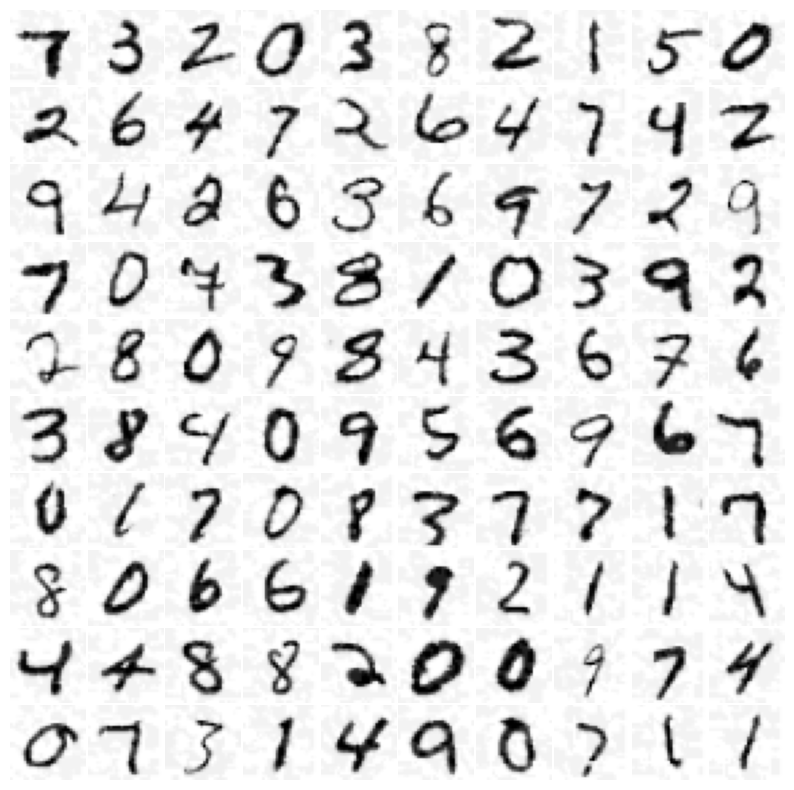

In [ ]:
# Número de ejemplos de entrenamiento
m = y_train.size
# Se seleccionan 100 datos para ser visualizados
rand_indices = np.random.choice(m, 100, replace=False)
sel = X_train.iloc[rand_indices, :]  # Corregí aquí utilizando iloc
displayData(sel)
plt.show()

##**2.1 Cargar datos de entrenamiento y prueba para Pythoch**

In [ ]:
# Cargar datos de entrenamiento y prueba
X_train = torch.tensor(df_train.drop('label', axis=1).values, dtype=torch.float32)
y_train = torch.tensor(df_train['label'].values, dtype=torch.int64)

X_test = torch.tensor(df_test.drop('label', axis=1).values, dtype=torch.float32)
y_test = torch.tensor(df_test['label'].values, dtype=torch.int64)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([25000, 784])
torch.Size([25000])
torch.Size([10000, 784])
torch.Size([10000])


##**2.2 Normalización de los datos**

In [ ]:
# Normalizamos los datos de entremiento y los datos de prueba
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Mostramos los datos normalizados
print(X_train_norm[0])
print(X_test_norm[0])

tensor([0.0980, 0.0980, 0.0980, 0.0941, 0.0941, 0.0980, 0.0980, 0.0980, 0.0980,
        0.0667, 0.0510, 0.0980, 0.0980, 0.0980, 0.0902, 0.0039, 0.0353, 0.0980,
        0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0667, 0.0000, 0.0588, 0.0980,
        0.0980, 0.0980, 0.0980, 0.0980, 0.0471, 0.0471, 0.0941, 0.0980, 0.0980,
        0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0784, 0.0353,
        0.0980, 0.0980, 0.0980, 0.0784, 0.0980, 0.0980, 0.0980, 0.0588, 0.0039,
        0.0784, 0.0980, 0.0980, 0.0980, 0.0980, 0.0471, 0.0000, 0.0784, 0.0980,
        0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0784,
        0.0196, 0.0627, 0.0627, 0.0902, 0.0039, 0.0627, 0.0706, 0.0980, 0.0980,
        0.0353, 0.0784, 0.0980, 0.0980, 0.0980, 0.0980, 0.0471, 0.0314, 0.0863,
        0.0510, 0.0980, 0.0980, 0.0980, 0.0980, 0.0980, 0.0588, 0.0941, 0.0471,
        0.0392, 0.0000, 0.0000, 0.0000, 0.0784, 0.0039, 0.0000, 0.0078, 0.0471,
        0.0745, 0.0353, 0.0392, 0.0941, 

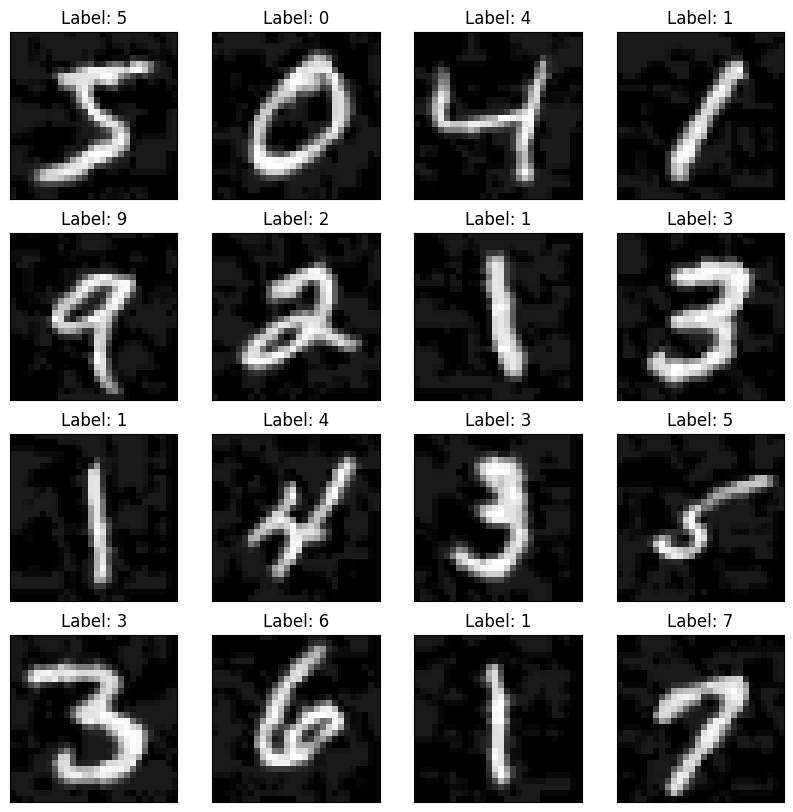

In [ ]:

# Función para mostrar imágenes de MNIST con etiquetas
def plot_images(images, labels, nrows, ncols, figsize=(10, 10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        # Mostrar imagen
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])  # Eliminar marcas de ejes
        ax.set_title(f"Label: {labels[i]}")  # Mostrar la etiqueta

# Seleccionar algunas imágenes normalizadas y sus etiquetas para mostrar
num_images_to_show = 16
images_to_show = X_train_norm[:num_images_to_show]
labels_to_show = y_train[:num_images_to_show]

# Graficar las imágenes con sus etiquetas
plot_images(images_to_show, labels_to_show, nrows=4, ncols=4)
plt.show()

##**3. Construcción del Modelo de Red Neuronal**

In [ ]:
# Aquí creamos nuestra red neuronal simple. Para más detalles aquí estamos subclasificando y
# Heredando de nn.Module, esta es la forma más general de crear tus redes y
# permite una mayor flexibilidad. Te animo a que consultes también nn.Sequential, que
# sería más fácil de usar en este escenario pero quería mostrarles algo que
# "siempre" funciona.

class RedNeuronal(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(RedNeuronal, self).__init__()

    # Nuestra primera capa lineal toma input_size, en este caso 784 nodos a 10
    # y nuestra segunda capa lineal toma 10 para el num_classes que tenemos, en
    # este caso 10.
    self.fc1 = nn.Linear(input_size, hidden_size)  # Capa lineal de entrada a oculta
    self.fc2 = nn.Linear(hidden_size, num_classes) # Capa lineal oculta a salida

  def forward(self, x):
    """
    x aquí están las imágenes mnist y las ejecutamos a través de fc1, fc2 que creamos arriba.
    También agregamos una función de activación ReLU en el medio y para eso (ya que no tiene parámetros)
    Recomiendo usar nn.funcional (F)
    """

    x = self.fc1(x)
    x = F.sigmoid(x)
    x = self.fc2(x)
    return x


In [ ]:
# Configure el dispositivo cuda para GPU si está disponible; de ​​lo contrario, ejecútelo en la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Hiperparámetros de nuestra red neuronal que dependen del conjunto de datos, y
# También simplemente experimentando para ver qué funciona bien (tasa de aprendizaje, por ejemplo).
input_size = 784        # Tamaño de entrada (dimensiones de las imágenes en MNIST)
hidden_size = 50       # Tamaño de la capa oculta
num_classes = 10        # Número de clases de salida (dígitos del 0 al 9 en MNIST)
learning_rate = 0.001   # Tasa de aprendizaje para el optimizador
batch_size = 256      # 10000 Tamaño del lote para el entrenamiento (número de muestras utilizadas en cada iteración)
num_epochs = 10          # Número de épocas de entrenamiento (iteraciones completas a través del conjunto de datos)

cpu


TensorDataset es una clase de PyTorch que permite combinar tensores de características (X_train_norm, X_test_norm) con tensores de etiquetas (y_train, y_test). Cada elemento en TensorDataset representa una muestra emparejada de características y etiquetas.

Se crean DataLoader personalizados para facilitar el procesamiento de los datos durante el entrenamiento y la evaluación del modelo.

In [ ]:
# Crear conjuntos de datos de PyTorch usando TensorDataset
train_dataset = TensorDataset(X_train_norm, y_train)
test_dataset = TensorDataset(X_test_norm, y_test)

# Crear DataLoader personalizados para iterar sobre los datos
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Inicializamos la red neuronal
model = RedNeuronal(input_size, hidden_size, num_classes).to(device)

# Mostramos el modelo
model

RedNeuronal(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
# Pérdida y optimizador
criterion = nn.CrossEntropyLoss() # Función de pérdida
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Variante del descenso de gradiente estocástico (SGD)

#**4. Entrenamiento del Modelo**

In [ ]:
# Entrenamiento del modelo
# Red de trenes
for epoch in range(num_epochs):
    # batch_idx: Es el índice del lote actual en la iteración.
    # data: Contiene las características (datos de entrada) del lote actual.
    # targets: Contiene las etiquetas (objetivos de salida) correspondientes al lote actual.
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):

        # Obtener datos para cuda si es posible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # print(data.shape)
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        print(data.shape)

        # forward
        # Se realizan las predicciones (scores) utilizando el modelo (model) sobre los datos de entrada (data).
        scores = model(data)
        loss = criterion(scores, targets) # Cálculo de la función de pérdida

        # backward
        optimizer.zero_grad() # Limpia los gradientes acumulados en los parámetros del modelo.
        loss.backward()  # Calcula los gradientes de los parámetros con respecto a la pérdida.

        # gradient descent or adam step
        optimizer.step()

 11%|█         | 11/98 [00:00<00:00, 101.44it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 33%|███▎      | 32/98 [00:00<00:00, 98.60it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 54%|█████▍    | 53/98 [00:00<00:00, 98.46it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 74%|███████▍  | 73/98 [00:00<00:00, 97.00it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 96.73it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])

 20%|██        | 20/98 [00:00<00:00, 97.16it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])

 41%|████      | 40/98 [00:00<00:00, 96.48it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 62%|██████▏   | 61/98 [00:00<00:00, 97.87it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 72%|███████▏  | 71/98 [00:00<00:00, 94.80it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 84%|████████▎ | 82/98 [00:00<00:00, 96.16it/s]

torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 96.45it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 20%|██        | 20/98 [00:00<00:00, 95.29it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 41%|████      | 40/98 [00:00<00:00, 94.91it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 61%|██████    | 60/98 [00:00<00:00, 96.02it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 71%|███████▏  | 70/98 [00:00<00:00, 91.56it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 82%|████████▏ | 80/98 [00:00<00:00, 91.80it/s]

torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 93.69it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])


 19%|█▉        | 19/98 [00:00<00:00, 93.28it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 30%|██▉       | 29/98 [00:00<00:00, 90.48it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 41%|████      | 40/98 [00:00<00:00, 94.28it/s]

torch.Size([256, 784])
torch.Size([256, 784])


 51%|█████     | 50/98 [00:00<00:00, 94.78it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 61%|██████    | 60/98 [00:00<00:00, 95.20it/s]

torch.Size([256, 784])
torch.Size([256, 784])


 71%|███████▏  | 70/98 [00:00<00:00, 90.85it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 82%|████████▏ | 80/98 [00:00<00:00, 92.18it/s]

torch.Size([256, 784])


 92%|█████████▏| 90/98 [00:00<00:00, 93.20it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 93.50it/s]


torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])


 10%|█         | 10/98 [00:00<00:00, 96.36it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 20%|██        | 20/98 [00:00<00:00, 95.05it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 31%|███       | 30/98 [00:00<00:00, 91.10it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 49%|████▉     | 48/98 [00:00<00:00, 74.23it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 57%|█████▋    | 56/98 [00:00<00:00, 69.50it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 65%|██████▌   | 64/98 [00:00<00:00, 69.87it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 73%|███████▎  | 72/98 [00:00<00:00, 69.63it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 90%|████████▉ | 88/98 [00:01<00:00, 71.02it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])

100%|██████████| 98/98 [00:01<00:00, 72.85it/s]



torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


  8%|▊         | 8/98 [00:00<00:01, 74.38it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 24%|██▍       | 24/98 [00:00<00:01, 41.45it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 40%|███▉      | 39/98 [00:00<00:01, 54.81it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 55%|█████▌    | 54/98 [00:01<00:00, 62.72it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 70%|███████   | 69/98 [00:01<00:00, 68.10it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 87%|████████▋ | 85/98 [00:01<00:00, 69.90it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 60.20it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])


 12%|█▏        | 12/98 [00:00<00:01, 57.86it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 26%|██▌       | 25/98 [00:00<00:01, 61.01it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 33%|███▎      | 32/98 [00:00<00:01, 59.98it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 40%|███▉      | 39/98 [00:00<00:00, 60.51it/s]

torch.Size([256, 784])


 54%|█████▍    | 53/98 [00:00<00:00, 63.09it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 61%|██████    | 60/98 [00:00<00:00, 63.52it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 69%|██████▉   | 68/98 [00:01<00:00, 66.09it/s]

torch.Size([256, 784])


 85%|████████▍ | 83/98 [00:01<00:00, 68.50it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 67.35it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])

 10%|█         | 10/98 [00:00<00:00, 93.01it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 21%|██▏       | 21/98 [00:00<00:00, 98.97it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 32%|███▏      | 31/98 [00:00<00:00, 94.80it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 42%|████▏     | 41/98 [00:00<00:00, 91.91it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])

 53%|█████▎    | 52/98 [00:00<00:00, 94.75it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 63%|██████▎   | 62/98 [00:00<00:00, 95.92it/s]

torch.Size([256, 784])
torch.Size([256, 784])


 73%|███████▎  | 72/98 [00:00<00:00, 94.96it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 84%|████████▎ | 82/98 [00:00<00:00, 94.46it/s]

torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 94.72it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 20%|██        | 20/98 [00:00<00:00, 95.52it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 31%|███       | 30/98 [00:00<00:00, 93.28it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 41%|████      | 40/98 [00:00<00:00, 92.36it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])

 51%|█████     | 50/98 [00:00<00:00, 92.55it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 61%|██████    | 60/98 [00:00<00:00, 93.97it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 71%|███████▏  | 70/98 [00:00<00:00, 94.59it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 82%|████████▏ | 80/98 [00:00<00:00, 94.00it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 94.15it/s]


torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


  0%|          | 0/98 [00:00<?, ?it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 19%|█▉        | 19/98 [00:00<00:00, 91.74it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 30%|██▉       | 29/98 [00:00<00:00, 89.12it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 40%|███▉      | 39/98 [00:00<00:00, 89.87it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 50%|█████     | 49/98 [00:00<00:00, 91.39it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 60%|██████    | 59/98 [00:00<00:00, 92.29it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 70%|███████   | 69/98 [00:00<00:00, 92.74it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


 81%|████████  | 79/98 [00:00<00:00, 94.55it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])


100%|██████████| 98/98 [00:01<00:00, 93.10it/s]

torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([256, 784])
torch.Size([168, 784])


#**5. Evaluación del modelo**

 La función de check_accuracy nos permite evaluar la precisión del modelo en un conjunto de datos (ya sea de entrenamiento o de prueba) y devolver la precisión calculada junto con las predicciones realizadas durante la evaluación. Esto nos permite monitorear el rendimiento del modelo en diferentes etapas del entrenamiento y evaluar su capacidad para generalizar a datos no vistos.

In [ ]:
# Evualuar el modelo
# Verifique la precisión del entrenamiento y las pruebas para ver qué tan bueno es nuestro modelo
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    predicciones = []  # Lista para almacenar todas las predicciones
    with torch.no_grad():
      # Iteración sobre el DataLoader
        for x, y in loader:
          # Transferencia de datos al dispositivo
            x = x.to(device=device)
            y = y.to(device=device)

            # Aplanar los datos
            x = x.reshape(x.shape[0], -1)

            # Realización de predicciones
            scores = model(x)
            _, predictions = scores.max(1)
            # predicciones.append(predictions)
            predicciones.extend(predictions.cpu().tolist())  # Agregar las predicciones a la lista

            # Actualización de contadores
            # num_correct += (predictions == y).sum()
            num_correct += (predictions == y).sum().item()
            num_samples += predictions.size(0)

    model.train() # Restablecimiento del modo de entrenamiento
    # Cálculo de la precisión
    accuracy = num_correct / num_samples
    return accuracy, predicciones


In [ ]:
p_train, pred_train  = check_accuracy(train_loader, model)
p_test, pred_test  = check_accuracy(test_loader, model)

print(f"Accuracy on training set: {p_train*100:.2f}")
print(f"Accuracy on test set: {p_test*100:.2f}")

Accuracy on training set: 94.10
Accuracy on test set: 93.88



##Visualización de algunas predicciones

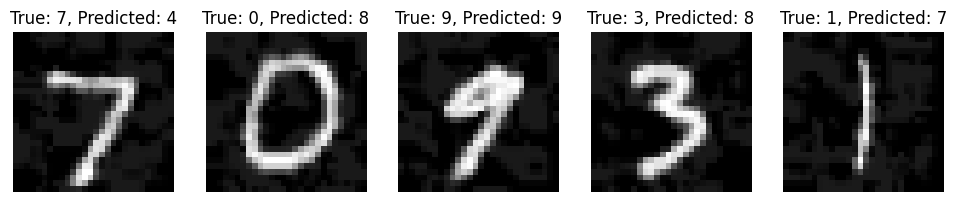

In [ ]:

# Definir una función para visualizar las imágenes con etiquetas reales y predichas
def visualize_predictions(images, true_labels, predicted_labels):
    num_samples = len(images)
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')  # Utilizar la predicción directamente
        plt.axis('off')
    plt.show()

# Obtener un lote de muestras del conjunto de prueba
sample_indices = [0, 10, 20, 30, 40]  # Índices de muestras que quieres visualizar
sample_images = [X_test[idx].cpu().numpy() for idx in sample_indices]
true_labels = [y_test[idx].item() for idx in sample_indices]
predicted_labels = [pred_test[idx] for idx in sample_indices]  # Usar la lista de predicciones directamente

# Visualizar las muestras seleccionadas con etiquetas reales y predichas
visualize_predictions(sample_images, true_labels, predicted_labels)


<ipython-input-61-238fcf3f70db>:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  sample_images_tensor = torch.tensor(sample_images, dtype=torch.float32).to(device)


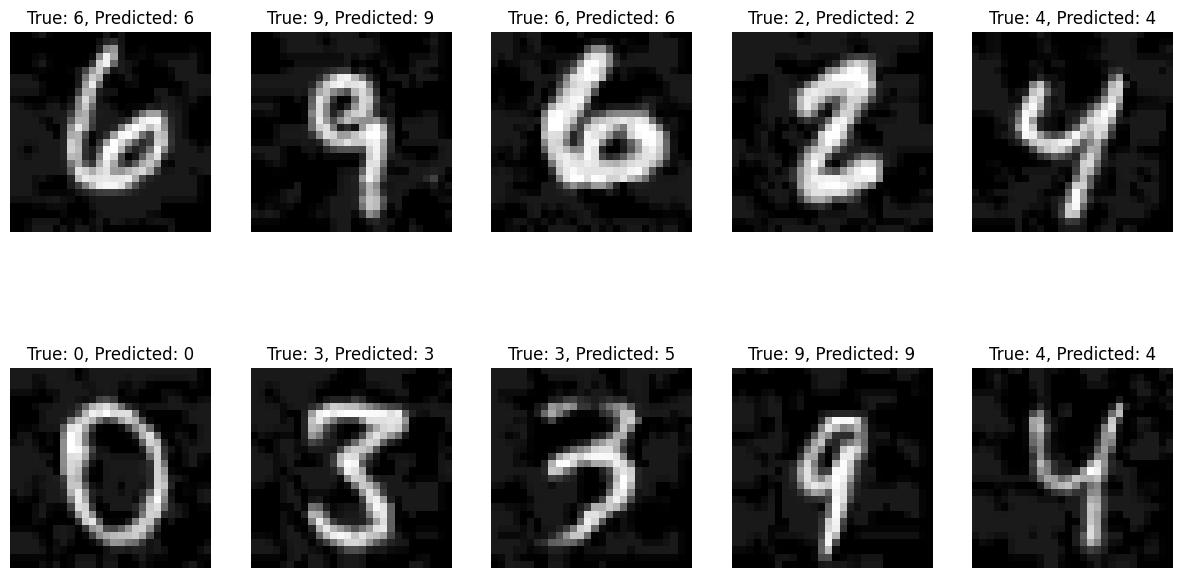

In [ ]:
import random

# Definir una función para visualizar las imágenes con etiquetas reales y predichas
def visualize_random_predictions(images, true_labels, predicted_labels):
    num_samples = len(images)
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

# Obtener 10 índices aleatorios del conjunto de prueba
random_indices = random.sample(range(len(X_test)), 10)
sample_images = [X_test[idx].cpu().numpy() for idx in random_indices]
true_labels = [y_test[idx].item() for idx in random_indices]

# Obtener predicciones para las imágenes seleccionadas
with torch.no_grad():
    model.eval()
    sample_images_tensor = torch.tensor(sample_images, dtype=torch.float32).to(device)
    sample_images_flat = sample_images_tensor.reshape(sample_images_tensor.shape[0], -1)
    scores = model(sample_images_flat)
    _, predicted_labels = scores.max(1)

predicted_labels = predicted_labels.tolist()

# Visualizar las 10 imágenes aleatorias con etiquetas reales y predichas
visualize_random_predictions(sample_images, true_labels, predicted_labels)


##**Informe de la Red Neuronal - Regresión Logística Multiclase aplicando PyTorch**

##**Introducción**

En este informe del laboratorio de redes neuronales, se presenta la implementación y evaluación de una red neuronal utilizando PyTorch para resolver el problema de clasificación de dígitos MNIST. PyTorch es un popular marco de trabajo de aprendizaje profundo que permite construir y entrenar redes neuronales de manera eficiente. El objetivo de este experimento es comparar los resultados obtenidos con la implementación anterior de una red neuronal sin PyTorch y analizar las mejoras en términos de precisión y facilidad de implementación.

##**Metodología**

En este experimento del laboratorio, se utilizó PyTorch para construir y entrenar una red neuronal de dos capas (una capa oculta) para clasificar imágenes de dígitos escritos a mano del conjunto de datos MNIST.

##**Descripción del Modelo**:

Se implementó una red neuronal utilizando la clase nn.Module de PyTorch.
La red neuronal consta de una capa de entrada (input_size), una capa oculta (hidden_size) con una función de activación ReLU, y una capa de salida (num_classes) para clasificar los dígitos del 0 al 9.

##**Inicialización de Parámetros**:

Dentro del modelo dentro de la Clase se inicializaron los pesos de las capas lineales (fc1 y fc2) de manera automática en PyTorch.

##**Entrenamiento del Modelo**:

Para este modelo que trata de una regresión logística multiclase se utilizó la función de pérdida nn.CrossEntropyLoss() para calcular la pérdida durante el entrenamiento del modelo.
Se empleó el optimizador optim.Adam para optimizar los pesos de la red neuronal mediante el método de descenso de gradiente estocástico.

##**Resultados**

Después de entrenar el modelo durante 10 épocas (numero de iteraciones), se obtuvieron los siguientes resultados:

 - Precisión en el conjunto de entrenamiento: 94.10%
 - Precisión en el conjunto de prueba: 93.88%


##**Análisis de Resultados**

###Discusión sobre la Precisión:

La precisión alcanzada en el conjunto de prueba es de (93.88%) esto nos dice que demuestra una buena efectividad del modelo para clasificar dígitos MNIST utilizando PyTorch.
La precisión es comparable e incluso ligeramente superior a la obtenida con la implementación sin PyTorch que fué una precisión de 74.44%, por lo que es mucho mejor trabajar con Pytorch en una red neuronal.

##**Mejores Configuraciones de Parámetros e Hiperparámetros:**

Durante el experimento del modelo, se observó que la arquitectura de dos capas con una función de activación ReLU en la capa oculta produjo buenos resultados.

En estos parámetros:

**input_size**: Como estamos trabajando con un dataset de MNIST donde las imagenes son 28x28 en total las varaibles de entrada en el capa de entrada son de 784.

**hidden_size**: Para la capa oculta en este caso trabajamos con un valor de 50, que representan a la cantidad de neuronas dentro de la capa oculta, a comparación del anterio modelo  donde solo eran 10 neuronas en este modelo se trabajó con 50 neuronas debido que trabajar con Pytorch es más eficiente y rápido al momento de entrenar el modelo.


**La tasa de aprendizaje (learning_rate)**: En el modelo se tuvo que probar con varios valores de tasa de aprendozaje como 1, 0.1, 00.1 donde los resultados variaron, por lo que se trabajó con un valor de 0.001 como valor más optimo que se pudo obtener.

**Tamaño del lote (batch_size)**: También fue factor clave para optimizar el rendimiento del modelo. en este caso en cada iteración del entrenamiento el numero de muestras que debia realizar para que el entrenamiento sea mas rapido, en este caso definimos el tamaño del lote con un valor de 256 debido a los recursos disponibles del Colab.

**num_epochs**: Para el número de iteraciones se utilizó un total de 10 iteraciones como valor óptimo ya que con mayor de numeros de iteraciones producía un sobreajuste con los pesos y reducia la precisión del modelo.


##**Conclusiones**

En conclusión, la implementación de una red neuronal utilizando PyTorch demostró ser efectiva para resolver el problema de clasificación de dígitos MNIST. Los resultados obtenidos muestran una mejora significativa en la precisión en comparación con la implementación sin PyTorch. Además en las pruebas de predicciones se mostró mas preciso con los resultados por lo que el modelo tiene un buen rendimiento, y tiene una buena precisión de 93.88% por lo que como conclusión fué mejor experimentar una red neuronal con Pytorch.

##**Logros y Limitaciones:**

Logramos implementar y entrenar una red neuronal utilizando PyTorch, obteniendo una precisión destacada en la clasificación de dígitos.
Sin embargo, una limitación podría ser la complejidad adicional de la implementación en comparación con la versión sin PyTorch.
